# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Inga Miller
### GitHub Repository: https://github.com/s566319/web-scrapping


Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [103]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                   Version
------------------------- ---------------
annotated-types           0.6.0
anyio                     4.3.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.14.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blis                      0.7.11
catalogue                 2.0.10
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
cloudpathlib              0.16.0
colorama                  0.4.6
comm                      0.2.1
confection                0.1.4
contourpy                 1.2.0
cycler                    0.12.1
cymem                     2.0.8
debugpy                   1.8.1
decorator                 5.1.1
defusedxml                0.7.1
en-core-web-sm            3.7.1
executing      

Question 1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [104]:
import requests
import pickle

url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

try:
    #fetch html content from url
    response = requests.get(url)
    if response.status_code == 200:
        article_html = response.text

        with open("article_html.pkl", "wb") as file:
            pickle.dump(article_html, file)
        print("This article html is now aved to 'article_html.pkl' succesfully.")
    else:
        print(f" Article failed to fetch the URL. Status code: {response.status_code}")
except requests.RequestException as e:
    print(f"There was an error while fetching url: {e}")

This article html is now aved to 'article_html.pkl' succesfully.


Question 2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [105]:
import pickle
from bs4 import BeautifulSoup

try:
    with open("article_html.pkl", "rb") as file:
        article_html = pickle.load(file)
    
    soup = BeautifulSoup(article_html, "html.parser")

    article_text = soup.get_text()
    print(article_text)

except FileNotFoundError:
    print("No file 'article_html.pkl' not found. Run the code from Question 1 above")
except Exception as e:
    print(f"Error occured and file will not be printed: {e}")



















How Laser Headlights Work | Hackaday






































































Skip to content






Hackaday


Primary Menu

Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About


Search for:



 March 27, 2021 






How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype 

Question 3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [106]:
import spacy
from collections import Counter
import string
from spacy.lang.en.stop_words import STOP_WORDS
import pickle
from bs4 import BeautifulSoup


def preprocess_txt(text):
    # Load spacy
    nlp = spacy.load("en_core_web_sm")

    #process the article
    doc = nlp(article_text)
    stop_words = nlp.Defaults.stop_words
    stop_words |= {"report", "comment", "March", "2021", "says", "am", "at", "pm"}   

    #process the article for interesting tokens
    interesting_tokens = [token.text.lower() for token in doc if token.text.lower() not in nlp.Defaults.stop_words and token.text.lower() not in string.punctuation and not token.is_space]

    #tokens = [token.text.lower() for token in doc if token.text.lower() not in stop_words and token.text.lower() not in string.punctuation and not token.is_space]
    return interesting_tokens


try:
        with open("article_html.pkl", "rb") as file:
            article_html = pickle.load(file)
            soup = BeautifulSoup(article_html, 'html.parser')
            article_text = soup.get_text()
            tokens = preprocess_txt(article_text)

            most_common_tokens = Counter(tokens).most_common(5)
            print("These are the five most frequent tokens:")
            for token, frequency in most_common_tokens:
                print(f"{token}: {frequency}")
except FileNotFoundError:
    print("File 'article_html.pkl' is not found.")
except Exception as e:
    print(f"An error has occured: {e}")



These are the five most frequent tokens:
hacks: 76
light: 68
laser: 63
headlights: 56
led: 41


Question 4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [107]:
import spacy
from collections import Counter
import string
from spacy.lang.en.stop_words import STOP_WORDS
import pickle
from bs4 import BeautifulSoup

def preprocess_txt(text):
    # Load spacy
    nlp = spacy.load("en_core_web_sm")

    #process the article
    doc = nlp(article_text)
    stop_words = nlp.Defaults.stop_words
    stop_words |= {"report", "comment", "March", "2021", "says", "am", "at", "pm"}

    #process the article for interesting lemas
    interesting_lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

    #tokens = [token.text.lower() for token in doc if token.text.lower() not in stop_words and token.text.lower() not in string.punctuation and not token.is_space]
    return interesting_lemmas

try:
        with open("article_html.pkl", "rb") as file:
            article_html = pickle.load(file)
            soup = BeautifulSoup(article_html, 'html.parser')
            article_text = soup.get_text()
            lemmas = preprocess_txt(article_text)
            lemma_frequencies = Counter(lemmas)
            most_common_lemmas = lemma_frequencies.most_common(5)

            print("These are the five most frequent lemmas:")
            for lemma, frequency in most_common_lemmas:
                 print(f"'{lemma}': {frequency}")

except FileNotFoundError:
    print("File 'article_html.pkl' is not found.")
except Exception as e:
    print(f"An error has occured: {e}")

These are the five most frequent lemmas:
'light': 99
'headlight': 73
'laser': 72
'car': 63
'beam': 53


Question 5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [108]:
import spacy
from collections import Counter
import string
from spacy.lang.en.stop_words import STOP_WORDS
import pickle
from bs4 import BeautifulSoup

# Load spacy
nlp = spacy.load("en_core_web_sm")
#process the article
doc = nlp(article_text)
interesting_tokens = [token.text.lower() for token in doc if token.text.lower() not in nlp.Defaults.stop_words and token.text.lower() not in string.punctuation and not token.is_space]
interesting_lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]


def score_sentence_by_token(sentence, interesting_token):
    words = sentence.lower().split()
    num_words = len(words)
    num_interesting = sum(1 for word in words if word in interesting_token)
    return num_interesting / num_words

def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and token.lower_ not in STOP_WORDS]
    num_words = len(lemmas)
    num_interesting = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return num_interesting / num_words

# Test the scoring functions using first sentence
first_sentence = article_text.split(".")[0]
print("This is the score of the first sentence using tokens:", score_sentence_by_token(first_sentence, interesting_tokens))
print("This is the score of the first sentence using lemmas:", score_sentence_by_lemma(first_sentence, interesting_lemmas))

This is the score of the first sentence using tokens: 0.8
This is the score of the first sentence using lemmas: 1.0


Question 6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

<function matplotlib.pyplot.show(close=None, block=None)>

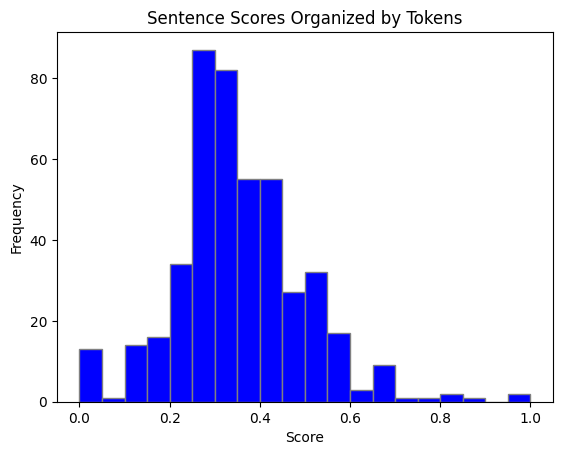

In [109]:
import matplotlib.pyplot as plt

sentences = [sent.text for sent in doc.sents]

# Adding interesting tokens and scores

interesting_tokens = [token.text.lower() for token in doc if token.text.lower() not in nlp.Defaults.stop_words and token.text.lower() not in string.punctuation and not token.is_space]

scores_by_tokens = [score_sentence_by_token(sentence, interesting_tokens) for sentence in sentences]
plt.hist(scores_by_tokens, bins=20, color='blue', edgecolor="gray")
plt.title("Sentence Scores Organized by Tokens")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show

Question 7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

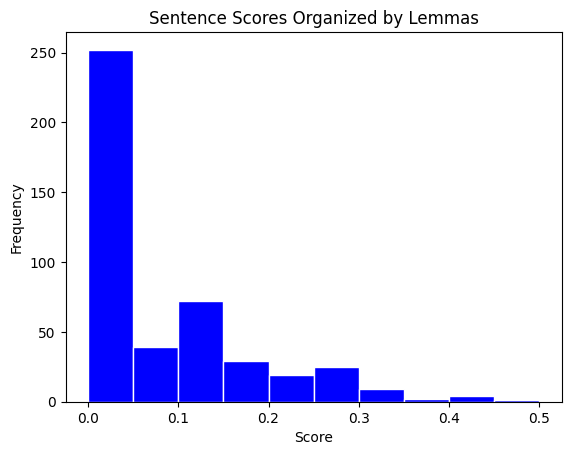

In [110]:
import matplotlib.pyplot as plt

def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    stop_words = nlp.Defaults.stop_words
    stop_words |= {"report", "comment", "March", "2021", "says", "am", "at", "pm"}
    lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and token.lower_ not in stop_words]
    num_words = len(lemmas)
    num_interesting = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    if num_words != 0:
        return num_interesting / num_words
    else: return 0

#Creating lemmas Score def
interesting_lemmas = [lemma for lemma, _ in most_common_lemmas]
sentences = [sent.text for sent in doc.sents]
scores_by_lemmas = [score_sentence_by_lemma(sentence, interesting_lemmas) for sentence in sentences]

# Plot the histogram of sentence scores
plt.hist(scores_by_lemmas, bins=10, color='blue', edgecolor="white")
plt.title("Sentence Scores Organized by Lemmas")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

Question 8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

The five most frequent tokens were: hacks: 76, light: 68, laser: 63, headlights: 56, led: 41

The five most frequent lemmas were: 'light': 99, 'headlight': 73, 'laser': 72, 'car': 63, 'beam': 53

Since all of the words are already nouns, the same words would remain on most frequent tokens and lemmas lists.

We could edit the code as below, but as we can see- the five most frequent list does not change, as mentioned above

try:
        with open("article_html.pkl", "rb") as file:
            article_html = pickle.load(file)
            soup = BeautifulSoup(article_html, "html.parser")
            article_text = soup.get_text()

            tokens = preprocess_txt(article_text)
            most_common_tokens = Counter(tokens).most_common(5)
            print("Updated most frequent tokens (Nouns only):")
            for token, frequency in most_common_lemmas:
                print(f"'{token}': {frequency}")
            sentences = [sent.text for sent in doc.sents]

        # Adding interesting tokens and scores

        interesting_tokens = [token.text.lower() for token in doc if token.text.lower() not in nlp.Defaults.stop_words and token.text.lower() not in string.punctuation and not token.is_space]

        scores_by_tokens = [score_sentence_by_token(sentence, interesting_tokens) for sentence in sentences]
        plt.hist(scores_by_tokens, bins=20, color='blue', edgecolor="white")
        plt.title("Sentence Scores Organized by Tokens using NOUNS only")
        plt.xlabel("Score")
        plt.ylabel("Frequency")
        plt.show          
except FileNotFoundError:
    print("The file 'article_html.pkl' is not found.")
except Exception as e:
    print(f"An error occured: {e}")

Updated most frequent tokens (Nouns only):
'light': 99
'headlight': 73
'laser': 72
'car': 63
'beam': 53


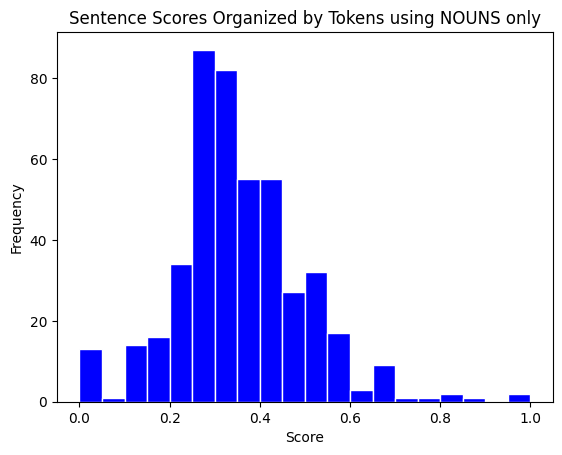

In [111]:
try:
        with open("article_html.pkl", "rb") as file:
            article_html = pickle.load(file)
            soup = BeautifulSoup(article_html, "html.parser")
            article_text = soup.get_text()

            tokens = preprocess_txt(article_text)
            most_common_tokens = Counter(tokens).most_common(5)
            print("Updated most frequent tokens (Nouns only):")
            for token, frequency in most_common_lemmas:
                print(f"'{token}': {frequency}")
            sentences = [sent.text for sent in doc.sents]

        # Adding interesting tokens and scores

        interesting_tokens = [token.text.lower() for token in doc if token.text.lower() not in nlp.Defaults.stop_words and token.text.lower() not in string.punctuation and not token.is_space]

        scores_by_tokens = [score_sentence_by_token(sentence, interesting_tokens) for sentence in sentences]
        plt.hist(scores_by_tokens, bins=20, color='blue', edgecolor="white")
        plt.title("Sentence Scores Organized by Tokens using NOUNS only")
        plt.xlabel("Score")
        plt.ylabel("Frequency")
        plt.show          
except FileNotFoundError:
    print("The file 'article_html.pkl' is not found.")
except Exception as e:
    print(f"An error occured: {e}")

In [112]:
!jupyter nbconvert --to html web-scraping.ipynb

[NbConvertApp] Converting notebook web-scraping.ipynb to html
[NbConvertApp] Writing 280241 bytes to web-scraping.html
